# Sales Analysis

### Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from itertools import combinations
from collections import Counter
import os

### Merging 12 months of sales data into single file

In [2]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(f"./Sales_Data/{file}")
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_months_data.csv", index=False)

### Read new dataframe (all_months_data)

In [3]:
all_data = pd.read_csv("./all_months_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Cleaning up the data

#### Drop rows that are NaN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Finding 'Or' rows and delete it

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to the correct type

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])#float

### Add additional columns

#### Month columns

In [7]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data['Month'] = all_data['Month'].apply(lambda x: calendar.month_name[x])
all_data['Month'] = pd.Categorical(all_data['Month'],categories=months, ordered=True)
all_data = all_data.sort_values(["Month"])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
140677,144303,iPhone,1,700.00,01/26/19 09:03,"419 Meadow St, San Francisco, CA 94016",January
143930,147402,Wired Headphones,1,11.99,01/04/19 18:10,"420 Dogwood St, Austin, TX 73301",January
143931,147403,Apple Airpods Headphones,1,150.00,01/08/19 12:06,"423 5th St, Atlanta, GA 30301",January
143932,147404,ThinkPad Laptop,1,999.99,01/23/19 10:04,"566 Elm St, New York City, NY 10001",January
143933,147405,AA Batteries (4-pack),1,3.84,01/16/19 08:43,"26 Forest St, Portland, OR 97035",January


#### Sales column

In [8]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
140677,144303,iPhone,1,700.00,01/26/19 09:03,"419 Meadow St, San Francisco, CA 94016",January,700.00
143930,147402,Wired Headphones,1,11.99,01/04/19 18:10,"420 Dogwood St, Austin, TX 73301",January,11.99
143931,147403,Apple Airpods Headphones,1,150.00,01/08/19 12:06,"423 5th St, Atlanta, GA 30301",January,150.00
143932,147404,ThinkPad Laptop,1,999.99,01/23/19 10:04,"566 Elm St, New York City, NY 10001",January,999.99
143933,147405,AA Batteries (4-pack),1,3.84,01/16/19 08:43,"26 Forest St, Portland, OR 97035",January,3.84


### 1) What was the best month for sales? How much was earned that month?

In [57]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales,Hour
Month,,,,
January,10903,1811768.38,1822256.73,139485
February,13449,2188884.72,2202022.42,172669
March,17005,2791207.83,2807100.38,218969
April,20558,3367671.02,3390670.24,262259
May,18667,3135125.13,3152606.75,238780
June,15253,2562025.61,2577802.26,195528
July,16072,2632539.56,2647775.76,206169
August,13448,2230345.42,2244467.88,172289
September,13109,2084992.09,2097560.13,168513


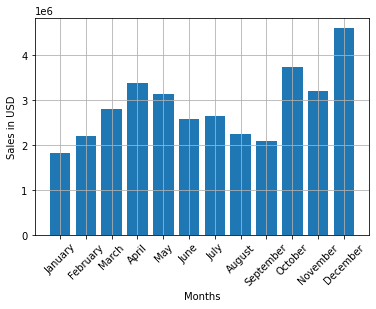

In [58]:
plt.bar(months ,results['Sales'])
plt.xticks(months , rotation=45)
plt.ylabel('Sales in USD')
plt.xlabel('Months')
plt.grid()
plt.show()

  From <strong>Bar graph</strong> above shows us that December (about 4.8 millon USD) which has the most sales. We can guess that on Christmas Day, people tend to buy things for one another.

### 2) What city had the highest number of sales?

#### Add city column

In [61]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
140677,144303,iPhone,1,700.00,2019-01-26 09:03:00,"419 Meadow St, San Francisco, CA 94016",January,700.00,San Francisco (CA),9
143930,147402,Wired Headphones,1,11.99,2019-01-04 18:10:00,"420 Dogwood St, Austin, TX 73301",January,11.99,Austin (TX),18
143931,147403,Apple Airpods Headphones,1,150.00,2019-01-08 12:06:00,"423 5th St, Atlanta, GA 30301",January,150.00,Atlanta (GA),12
143932,147404,ThinkPad Laptop,1,999.99,2019-01-23 10:04:00,"566 Elm St, New York City, NY 10001",January,999.99,New York City (NY),10
143933,147405,AA Batteries (4-pack),1,3.84,2019-01-16 08:43:00,"26 Forest St, Portland, OR 97035",January,3.84,Portland (OR),8


In [62]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Sales,Hour
City,,,,
Atlanta (GA),16602,2779908.20,2795498.58,214264
Austin (TX),11153,1809873.61,1819581.75,141946
Boston (MA),22528,3637409.77,3661642.01,288225
Dallas (TX),16730,2752627.82,2767975.40,214390
Los Angeles (CA),33289,5421435.23,5452570.80,427444
New York City (NY),27932,4635370.83,4664317.43,357696
Portland (ME),2750,447189.25,449758.27,35211
Portland (OR),11303,1860558.22,1870732.34,144421
San Francisco (CA),50239,8211461.74,8262203.91,643265


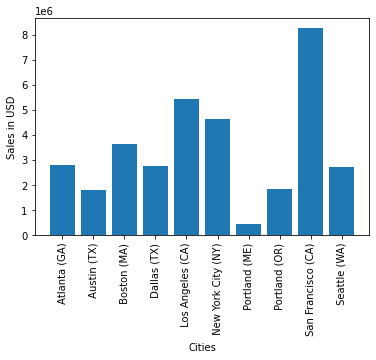

In [63]:
cities = [city for city,df in all_data.groupby('City')]  # make cities has the same ordering as the groupby output 

plt.bar(cities ,results['Sales'])
plt.xticks(cities , rotation=90)
plt.ylabel('Sales in USD')
plt.xlabel('Cities')
plt.show()

According to the <strong>Bar graph</strong> , we can see that San Francisco(CA) has the most sales.We can assume that most people that live in Sanfrancisco have a good quality in life and better income than other cities. 

### 3) What time should we display advertisement to maximize likelihood of customer's buying product?

In [59]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [60]:
all_data['Hour'] = all_data['Order Date'].dt.hour
# all_data['Minute'] = all_data['Order Date'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
140677,144303,iPhone,1,700.00,2019-01-26 09:03:00,"419 Meadow St, San Francisco, CA 94016",January,700.00,San Francisco (CA),9
143930,147402,Wired Headphones,1,11.99,2019-01-04 18:10:00,"420 Dogwood St, Austin, TX 73301",January,11.99,Austin (TX),18
143931,147403,Apple Airpods Headphones,1,150.00,2019-01-08 12:06:00,"423 5th St, Atlanta, GA 30301",January,150.00,Atlanta (GA),12
143932,147404,ThinkPad Laptop,1,999.99,2019-01-23 10:04:00,"566 Elm St, New York City, NY 10001",January,999.99,New York City (NY),10
143933,147405,AA Batteries (4-pack),1,3.84,2019-01-16 08:43:00,"26 Forest St, Portland, OR 97035",January,3.84,Portland (OR),8
...,...,...,...,...,...,...,...,...,...,...
21975,316656,Apple Airpods Headphones,1,150.00,2019-12-08 10:12:00,"564 5th St, San Francisco, CA 94016",December,150.00,San Francisco (CA),10
21974,316655,USB-C Charging Cable,1,11.95,2019-12-01 19:43:00,"951 River St, New York City, NY 10001",December,11.95,New York City (NY),19
21973,316654,Wired Headphones,2,11.99,2019-12-24 11:39:00,"490 Highland St, Los Angeles, CA 90001",December,23.98,Los Angeles (CA),11
21995,316676,Lightning Charging Cable,1,14.95,2019-12-22 02:20:00,"918 1st St, San Francisco, CA 94016",December,14.95,San Francisco (CA),2


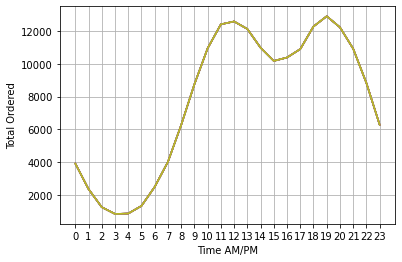

In [16]:
hours = [hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Time AM/PM')
plt.ylabel('Total Ordered')
plt.grid()
plt.show()

From <strong>graph</strong> above if saler want to improve anything with a sale system, they should do that at night. If they want to stock the product, they should do it before 12PM and 19PM because at that time there are a lot of ordering.

### 4) What product are most often sold together?

In [17]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

/var/folders/8g/5c7z95cn649g4zq843nlr7q40000gn/T/ipykernel_15911/763692634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
143971,147439,"Vareebadd Phone,USB-C Charging Cable"
143977,147444,"Vareebadd Phone,USB-C Charging Cable"
143955,147425,"iPhone,Lightning Charging Cable"
143985,147451,"Google Phone,Wired Headphones"
143892,147366,"Wired Headphones,AA Batteries (4-pack)"


In [18]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable') 571
('iPhone', 'Lightning Charging Cable') 552
('Lightning Charging Cable', 'iPhone') 463
('USB-C Charging Cable', 'Google Phone') 428
('iPhone', 'Wired Headphones') 246
('Google Phone', 'Wired Headphones') 237
('Wired Headphones', 'iPhone') 216
('Vareebadd Phone', 'USB-C Charging Cable') 210
('iPhone', 'Apple Airpods Headphones') 193
('Wired Headphones', 'Google Phone') 186


<strong>Google phone, USB-C Charging Cable</strong> and <strong>iPhone,Lightning Charging Cable</strong> are often being bought together. We can think of promotion to pursuade a customers.

### 5) What product sold the most? Why do you think it sold the most?

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
140677,144303,iPhone,1,700.00,2019-01-26 09:03:00,"419 Meadow St, San Francisco, CA 94016",January,700.00,San Francisco (CA),9
143930,147402,Wired Headphones,1,11.99,2019-01-04 18:10:00,"420 Dogwood St, Austin, TX 73301",January,11.99,Austin (TX),18
143931,147403,Apple Airpods Headphones,1,150.00,2019-01-08 12:06:00,"423 5th St, Atlanta, GA 30301",January,150.00,Atlanta (GA),12
143932,147404,ThinkPad Laptop,1,999.99,2019-01-23 10:04:00,"566 Elm St, New York City, NY 10001",January,999.99,New York City (NY),10
143933,147405,AA Batteries (4-pack),1,3.84,2019-01-16 08:43:00,"26 Forest St, Portland, OR 97035",January,3.84,Portland (OR),8


In [34]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

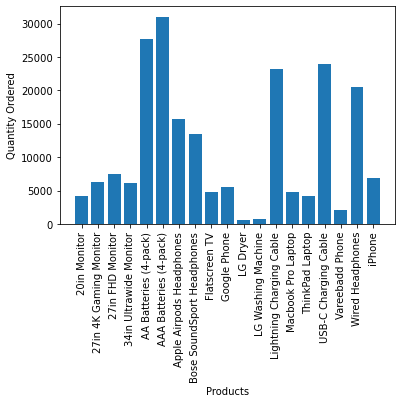

In [37]:
products = [product for product,df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products , rotation=90)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

/var/folders/8g/5c7z95cn649g4zq843nlr7q40000gn/T/ipykernel_15911/1457133237.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products , rotation='vertical')


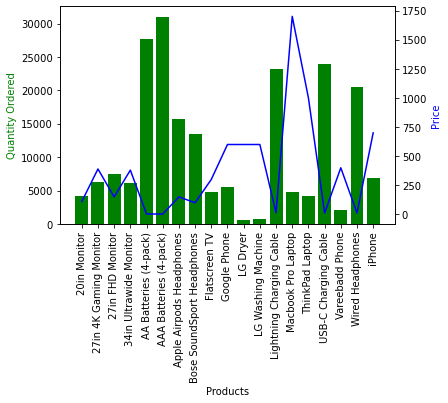

In [54]:
prices = all_data.groupby('Product').mean()['Price Each']

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered ,color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products , rotation='vertical')

plt.show()

As we see the <strong>graph</strong> above, products that have an expensive price tend to have less ordering from customers.